# Customer Segmentation

In [1]:
#Importing Library
#Analyzing, Cleaning
import pandas as pd

In [2]:
#Reading csv file
df1 = pd.read_csv('C:/Users/hp/Downloads/Mall_Customers.csv')
df = pd.read_csv('C:/Users/hp/Downloads/Mall_Customers.csv')

In [3]:
# print(df.to_string()) - to print the entire dataset

In [4]:
#df is used to print the head and tail of the dataset
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,128,18


In [5]:
#standardizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:,2:]=scaler.fit_transform(df.iloc[:,2:])

In [6]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,-1.424569,-1.752181,-0.434801
1,2,Male,-1.281035,-1.752181,1.195704
2,3,Female,-1.352802,-1.713646,-1.715913
3,4,Female,-1.137502,-1.713646,1.040418
4,5,Female,-0.563369,-1.675111,-0.395980
...,...,...,...,...,...
195,196,Female,-0.276302,2.293982,1.118061
196,197,Female,0.441365,2.525191,-0.861839
197,198,Male,-0.491602,2.525191,0.923953
198,199,Male,-0.491602,2.602261,-1.250054


In [7]:
#Prints the shape (rows,columns)
df.shape

(200, 5)

In [8]:
#Prints the information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    float64
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.9+ KB


In [9]:
#checking for null values using isna and printing the sum of those values
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
#df.iloc return rows and columns
#returns all the rows and 3,4th columns
#selecting the required features
X = df.iloc[:,[3,4]].values
print(X[0:5,:])

[[-1.75218119 -0.43480148]
 [-1.75218119  1.19570407]
 [-1.71364631 -1.71591298]
 [-1.71364631  1.04041783]
 [-1.67511142 -0.39597992]]


# Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='Age'>

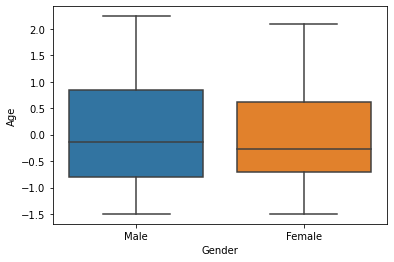

In [11]:
#importing library
#visualization library 
#extended version of matplotlib.pyplot
import seaborn as sns
#boxplot - outliers can be identified
sns.boxplot(x="Gender",y="Age",data=df)

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

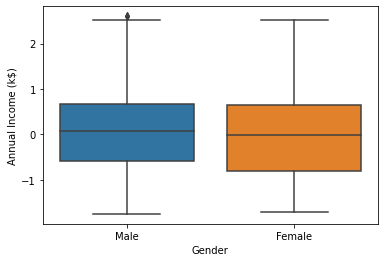

In [12]:
sns.boxplot(x="Gender",y="Annual Income (k$)",data=df)

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

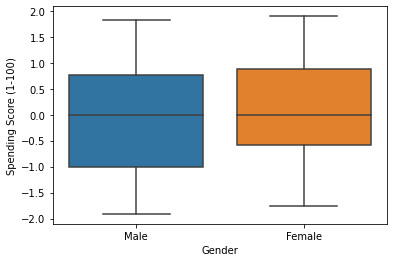

In [13]:
sns.boxplot(x="Gender",y="Spending Score (1-100)",data=df)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

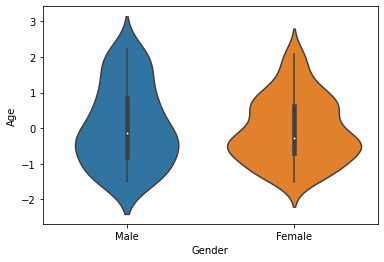

In [14]:
#violinplot
sns.violinplot(x="Gender",y="Age",data=df)

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

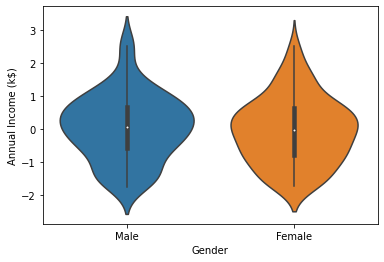

In [15]:
sns.violinplot(x="Gender",y="Annual Income (k$)",data=df)

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

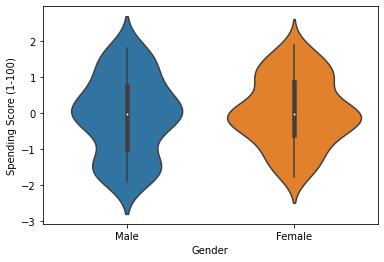

In [16]:
sns.violinplot(x="Gender",y="Spending Score (1-100)",data=df)

# Fitting Models:

# **K - Means Algorithm**

A simple **Unsupervised learning** algorithm that is used to solve clustering problems. Classifying a given data set into a number of clusters

WCSS -> Within Clusters Sum of Squares

Sum of Square Error (SSE) is a formula used to **measure the difference between the data obtained by the prediction model.**

The within-cluster sum of squares is a **measure of the variability** of the observations within each cluster. In general, a cluster that has a **small sum of squares is more compact** than a cluster that has a large sum of squares.

In [17]:
# finding wcss value for different number of clusters
# Random_State = 42 ?
# Range is used to find the optimal no.of clusters

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

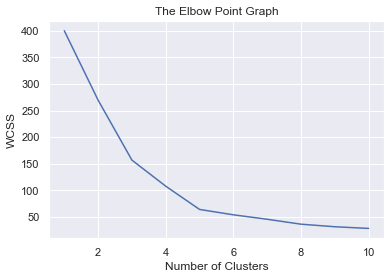

In [18]:
#importing library
#Elbow method
import matplotlib.pyplot as plt
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
from pylab import rcParams
#PyLab is a module that gets installed alongside Matplotlib

**Optimum Number of Clusters = 5**

In [19]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 2 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


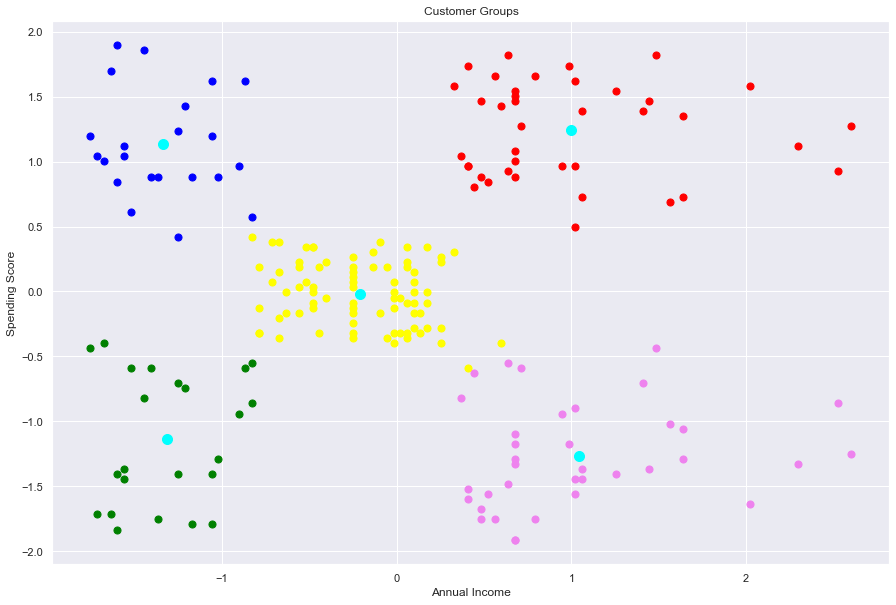

In [20]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(15,10))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

**Insights**
1) Group 1 (Dark Blue): People in the group do not have high income but they have good spending score.<br>
2) Group 2 (Green): People in the group have very low income and also very low spending score. People with less income tend to purchase less in supermarkets and malls.<br>
3) Group 3 (Pink): People in the group have high income but they have very less spending score. People in the group are very cautious about what they are buying.<br>
4) Group 4 (Yellow): People in the group have average income and average spending score.<br>
5) Group 5 (Red): People in the group have high income and high spending score.<br>

**Suggestions**
1) Mall can give offers to the people who are not buying too much.<br>
2) For Group 2 and group 3 people the mall can give discounts and offers using membership cards, so that they tend to buy more products in the mall which increases profit to the mall and brings customer satisfaction.

# **Hierarchical Clustering**

It is a method for grouping objects together. It creates groups so that objects within a group are similar to each other and different from objects in other groups. Clusters are visually represented in a hierarchical tree called a dendrogram.

In [21]:
#importing libraries
#SciPy is a scientific computation library that uses NumPy underneath
#Cluster allows to create several groups (clusters)
import scipy.cluster.hierarchy as hc
#Hierarchical Clustering
#PyLab is a module that gets installed alongside Matplotlib
#rcparams ?
from pylab import rcParams

Dendrogram is a graphical representation of Hierarchical Clustering. More the vertical length of line in dendogram, more the distance between the clusters. dendogram is help in finding the number of clusters. We set a threshold distance and draw a horizontal line.Then the number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.

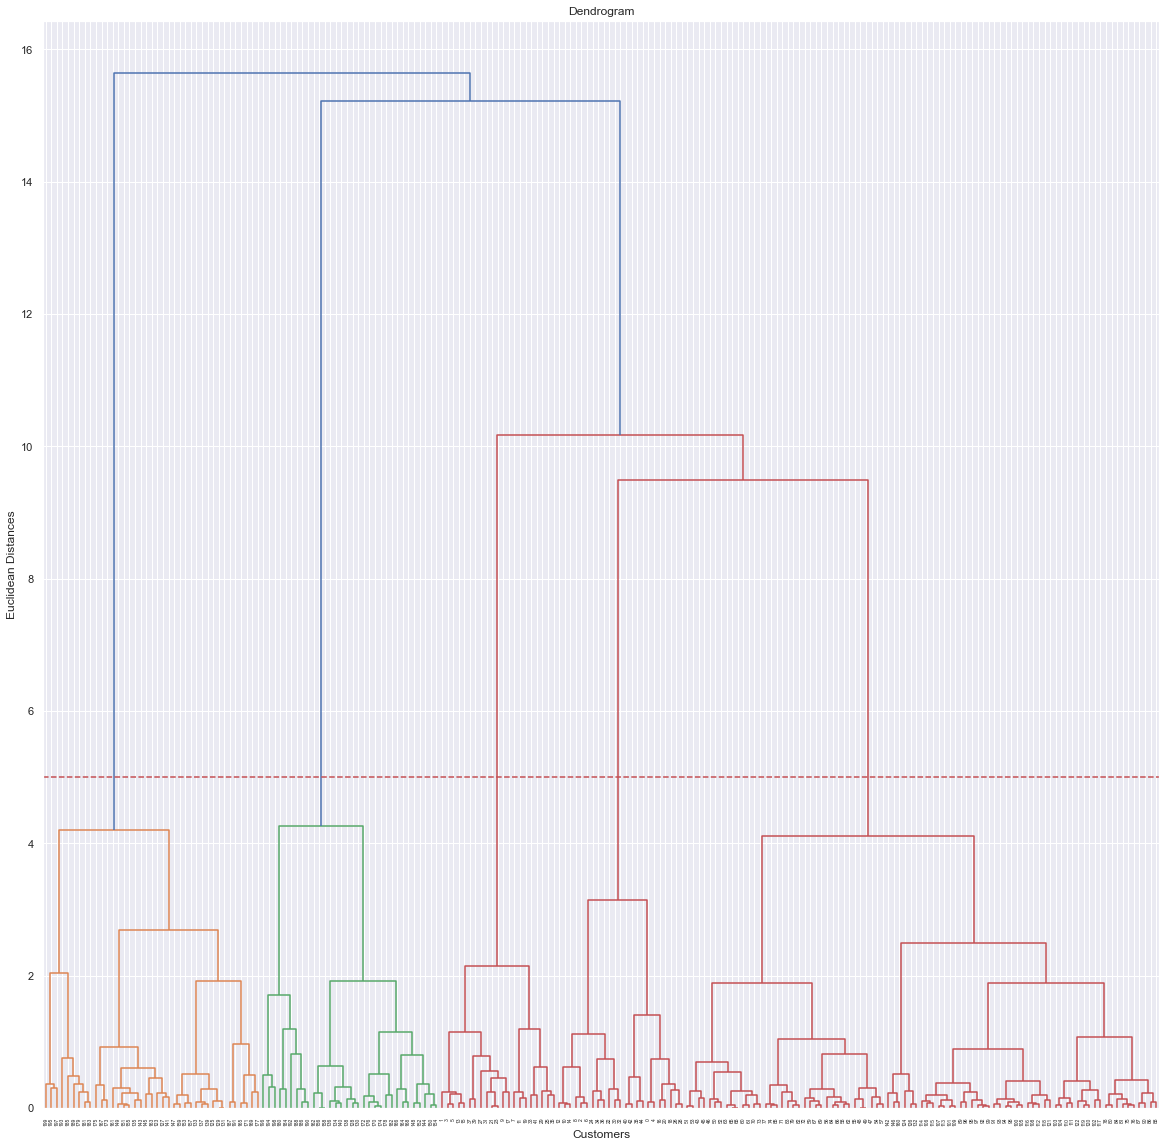

In [31]:
dendogram  = hc.dendrogram(hc.linkage(X, method = 'ward'))
#linkages ?
rcParams['figure.figsize'] = 10, 10
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(5, c='r', linestyle='--')
plt.show()

**Here's the number of Cluster is (n_clusters) = 5**

**Insight:**

The customers in different groups are displayed.

In [23]:
for i in range(0, len(X)):
    if Y[i]==0:
        print(df1.iloc[i,:])
        print()

CustomerID                   1
Gender                    Male
Age                         19
Annual Income (k$)          15
Spending Score (1-100)      39
Name: 0, dtype: object

CustomerID                     3
Gender                    Female
Age                           20
Annual Income (k$)            16
Spending Score (1-100)         6
Name: 2, dtype: object

CustomerID                     5
Gender                    Female
Age                           31
Annual Income (k$)            17
Spending Score (1-100)        40
Name: 4, dtype: object

CustomerID                     7
Gender                    Female
Age                           35
Annual Income (k$)            18
Spending Score (1-100)         6
Name: 6, dtype: object

CustomerID                   9
Gender                    Male
Age                         64
Annual Income (k$)          19
Spending Score (1-100)       3
Name: 8, dtype: object

CustomerID                  11
Gender                    Male
Age          

In [24]:
for i in range(0, len(X)):
    if Y[i]==1:
        print(df1.iloc[i,:])
        print()

CustomerID                 124
Gender                    Male
Age                         39
Annual Income (k$)          69
Spending Score (1-100)      91
Name: 123, dtype: object

CustomerID                   126
Gender                    Female
Age                           31
Annual Income (k$)            70
Spending Score (1-100)        77
Name: 125, dtype: object

CustomerID                 128
Gender                    Male
Age                         40
Annual Income (k$)          71
Spending Score (1-100)      95
Name: 127, dtype: object

CustomerID                 130
Gender                    Male
Age                         38
Annual Income (k$)          71
Spending Score (1-100)      75
Name: 129, dtype: object

CustomerID                 132
Gender                    Male
Age                         39
Annual Income (k$)          71
Spending Score (1-100)      75
Name: 131, dtype: object

CustomerID                   134
Gender                    Female
Age                

In [25]:
for i in range(0, len(X)):
    if Y[i]==2:
        print(df1.iloc[i,:])
        print()

CustomerID                    44
Gender                    Female
Age                           31
Annual Income (k$)            39
Spending Score (1-100)        61
Name: 43, dtype: object

CustomerID                    47
Gender                    Female
Age                           50
Annual Income (k$)            40
Spending Score (1-100)        55
Name: 46, dtype: object

CustomerID                    48
Gender                    Female
Age                           27
Annual Income (k$)            40
Spending Score (1-100)        47
Name: 47, dtype: object

CustomerID                    49
Gender                    Female
Age                           29
Annual Income (k$)            40
Spending Score (1-100)        42
Name: 48, dtype: object

CustomerID                    50
Gender                    Female
Age                           31
Annual Income (k$)            40
Spending Score (1-100)        42
Name: 49, dtype: object

CustomerID                    51
Gender           

In [26]:
for i in range(0, len(X)):
    if Y[i]==3:
        print(df1.iloc[i,:])
        print()

CustomerID                   125
Gender                    Female
Age                           23
Annual Income (k$)            70
Spending Score (1-100)        29
Name: 124, dtype: object

CustomerID                 129
Gender                    Male
Age                         59
Annual Income (k$)          71
Spending Score (1-100)      11
Name: 128, dtype: object

CustomerID                 131
Gender                    Male
Age                         47
Annual Income (k$)          71
Spending Score (1-100)       9
Name: 130, dtype: object

CustomerID                   133
Gender                    Female
Age                           25
Annual Income (k$)            72
Spending Score (1-100)        34
Name: 132, dtype: object

CustomerID                 135
Gender                    Male
Age                         20
Annual Income (k$)          73
Spending Score (1-100)       5
Name: 134, dtype: object

CustomerID                   137
Gender                    Female
Age      

In [27]:
for i in range(0, len(X)):
    if Y[i]==4:
        print(df1.iloc[i,:])
        print()

CustomerID                   2
Gender                    Male
Age                         21
Annual Income (k$)          15
Spending Score (1-100)      81
Name: 1, dtype: object

CustomerID                     4
Gender                    Female
Age                           23
Annual Income (k$)            16
Spending Score (1-100)        77
Name: 3, dtype: object

CustomerID                     6
Gender                    Female
Age                           22
Annual Income (k$)            17
Spending Score (1-100)        76
Name: 5, dtype: object

CustomerID                     8
Gender                    Female
Age                           23
Annual Income (k$)            18
Spending Score (1-100)        94
Name: 7, dtype: object

CustomerID                    10
Gender                    Female
Age                           30
Annual Income (k$)            19
Spending Score (1-100)        72
Name: 9, dtype: object

CustomerID                    12
Gender                    Female